# Plotting the maximum radius and corresponding P_ZAMS

When computing the formation efficiency, one factor that comes into play is the range of periods of stars that interact

To estimate this, I want to plot the maximum radius of stars at different metallicities for a typical BH and NS progenitor star, and then plot the corresponging P_ZAMS 

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py as h5
from astropy import constants as const
from astropy import units as u
import pickle

######################################
## PLOT setttings
plt.rc('font', family='serif')
from matplotlib import rc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
rc('text', usetex=False)
fsize, SMALL_SIZE, MEDIUM_SIZE, BIGGER_SIZE = 30,18,25,30
for obj in ['axes','xtick','ytick']:
    plt.rc(obj, labelsize=MEDIUM_SIZE)          # controls default text sizes
for obj in ['figure','axes']:
    plt.rc(obj, titlesize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize


######################################
home_dir = os.path.expanduser("~") 

Zenodo_data_dir = f'{home_dir}/ceph/CompasOutput/Zenodo_vanSon2024' # change to your local path 
root_out_dir    = Zenodo_data_dir  # {home_dir}/ceph/CompasOutput/{compas_v}/{sim_name} compas_v = "v03.01.02" sim_name = "NewWinds_RemFryer2012"# sim_name determines which flags to run COMPAS with



# Load the Single star grid data

# Analysis Results

To run the data that we load here see the [SingleStarInspectionPerMetallicity.ipynb](run_data/SingleStarInspectionPerMetallicity.ipynb) notebook.


In [4]:
# Create a dict out of your single star data
if not os.path.exists(f'{root_out_dir}/Single_star_data.pkl'):
    # Initialize an empty dictionary
    data = {
        'M0': [],
        'Metals': [],
        'maxRadii': [],
        'maxR_type': [],
        'maxR_massloss': [],
        #
        'R_ZAMS': [],
        'maxR_MS': [],
        'maxR_HG': [],
        'maxR_FGB': [],
        'maxR_CHeB': [],
        'maxR_EAGB': [],
        #
        'Luminosity': [],
        'Teff': [],
        'Radius': [],
        'Mass': [],
        'Stellar_Type': [],
        'Dominant_Wind': []
    }

    # For each mass, compute the values and append them to the lists
    for mass in [10, 20, 30, 40, 50, 60, 70,90, 100, 150]:
        print('mass', mass)

        read_loc =  f'{root_out_dir}/SingleStarGrids/SingleStars_M{mass}/'

        print('reading ', read_loc)
        
        try:
            Metals, maxRadii, maxR_type, maxR_massloss   = [],  [],  [],  []
            R_ZAMS, maxR_MS, maxR_HG, maxR_FGB, maxR_CHeB, maxR_EAGB = [], [], [], [], [], []
            L, Teff, M, Radius, stellar_type, dominant_wind = [], [], [], [], [], []

            for i in range(100):
                # Read detailed hdf5 file
                detailh5 = h5.File(f'{read_loc}/Detailed_Output/BSE_Detailed_Output_{i}.h5', 'r')

                ####################################### 
                # Maximum radius at all times
                i_maxR = np.argmax(detailh5['Radius(1)'][()])
                Metals.append(detailh5['Metallicity@ZAMS(1)'][0])
                maxRadii.append( detailh5['Radius(1)'][i_maxR] )
                maxR_type.append(detailh5['Stellar_Type(1)'][i_maxR])   
                maxR_massloss.append(detailh5['Dominant_Mass_Loss_Rate(1)'][i_maxR])

                #######################################
                # Select the maximum radius for each stellar type
                R_ZAMS.append(detailh5['Radius(1)'][0])

                st1 = detailh5['Stellar_Type(1)'][()]
                MS_bool = np.logical_or(st1 == 0, st1 == 1)
                maxR_MS.append(max(detailh5['Radius(1)'][MS_bool]) )

                HG_bool = st1 == 2
                maxR_HG.append(max(detailh5['Radius(1)'][HG_bool]) if np.any(HG_bool) > 0 else 0)

                FGB_bool = st1 == 3
                maxR_FGB.append(max(detailh5['Radius(1)'][FGB_bool]) if np.any(FGB_bool) > 0 else 0)
                
                CHeB_bool = st1 == 4
                maxR_CHeB.append(max(detailh5['Radius(1)'][CHeB_bool]) if np.any(CHeB_bool) > 0 else 0 )

                EAGB_bool = st1 == 5
                maxR_EAGB.append(max(detailh5['Radius(1)'][EAGB_bool]) if np.any(EAGB_bool) > 0 else 0 )

                #######################################
                # For HR diagram
                L.append(detailh5['Luminosity(1)'][()])
                Teff.append(detailh5['Teff(1)'][()])
                Radius.append(detailh5['Radius(1)'][()])
                M.append(detailh5['Mass(1)'][()])
                stellar_type.append(detailh5['Stellar_Type(1)'][()])
                dominant_wind.append(detailh5['Dominant_Mass_Loss_Rate(1)'][()])

                maxR_RL1 = np.max(detailh5['Radius(1)'][()]/detailh5['RocheLobe(1)'][()]) 
                if maxR_RL1 > 1.0:
                    print(f'Watch out! maxR_RL1: {maxR_RL1} for {i}')
                maxR_RL2 = np.max(detailh5['Radius(2)'][()]/detailh5['RocheLobe(2)'][()]) 
                if maxR_RL2 > 1.0:
                    print(f'Watch out! maxR_RL2: {maxR_RL2} for {i}')
                        
            # Max R
            data['M0'].append(mass)
            data['Metals'].append(Metals)
            data['maxRadii'].append(maxRadii)
            data['maxR_type'].append(maxR_type)
            data['maxR_massloss'].append(maxR_massloss)

            # Max R per type
            data['R_ZAMS'].append(R_ZAMS)
            data['maxR_MS'].append(maxR_MS)
            data['maxR_HG'].append(maxR_HG)
            data['maxR_FGB'].append(maxR_FGB)
            data['maxR_CHeB'].append(maxR_CHeB)
            data['maxR_EAGB'].append(maxR_EAGB)

            # HR
            data['Luminosity'].append(L)
            data['Teff'].append(Teff)   
            data['Radius'].append(Radius)  
            data['Mass'].append(M)  
            data['Stellar_Type'].append(stellar_type)  
            data['Dominant_Wind'].append(dominant_wind)  

        except Exception as e:
            print('ERR:', e)
            traceback.print_exc()
            continue

    with open(f'{root_out_dir}/Single_star_data.pkl', 'wb') as f:
        pickle.dump(data, f)

else:
    with open(f'{root_out_dir}/Single_star_data.pkl', 'rb') as f:
        data = pickle.load(f)

## We are looking for the case where R_star = R_RL

$$
\frac{R_{RL}}{a}  = \frac{0.49 \cdot q^{2/3}}{0.6 \cdot q^{2/3} + \ln(1 + q^{1/3})}
$$

assuming that $R_{\star} = R_{RL}$ (i.e. you are roche lobe overflowing)

$$
a_{RL} = \frac{R_{\star}}{\frac{0.49 \cdot q^{2/3}}{0.6 \cdot q^{2/3} + \ln(1 + q^{1/3})}}
$$


##  translate R_max into a plot of Period

\begin{equation}
P = 2\pi \left( \frac{a_{RL}^3}{G M_{tot}}  \right)^{0.5}
\end{equation}

In [5]:
# Roche lobe formula
def calc_Rrl(a, q):
    "your RL radius will be in units of a"
    return a * ( (0.49 * q**(2/3)) / (0.6 * q**(2/3) + np.log(1 + q**(1/3)) ) )

def calc_arl(R, q):
    "your semi major axis a will be in units of R"
    f_q = ( (0.49 * q**(2/3)) / (0.6 * q**(2/3) + np.log(1 + q**(1/3)) ) ) # RL formula f(q)
    return R/f_q 

def Kepler3(a,m1,m2):
    a = np.array(a) * const.R_sun.to('m')
    m1 = np.array(m1) * const.M_sun.to('kg')
    m2 = np.array(m2) * const.M_sun.to('kg')

    #Separations to periods in seconds
    P = (2 * np.pi) * ((a**3)/(const.G * (m1 + m2) ) )**0.5
    P = P.to('day')
    return P.value

def get_Prl(R,q,m1,m2):
    """
        R : stellar radius (assumed to come in Rsun!)
        q : mass ratio
        m1: star 1 mass (assumed to come in Msun!)
        m2: star 2 mass (assumed to come in Msun!)
    """

    # first get the semi major axis corresponding to Roche lobe radius
    a = calc_arl(R, q)

    # translate this into a period
    P = Kepler3(a,m1,m2)
    return P


In [6]:
# We sample binaries from 0.01 AU to 1000 AU, this corresponds to :
Pmin,Pmax = Kepler3(0.01*u.AU.to('R_sun'), 10, 10), Kepler3(1000*u.AU.to('R_sun'), 10, 10)
print(f'PZAMS min for 10 Msun = {Pmin} days, or in log {np.log10(Pmin)}')
print(f'PZAMS MAX for 10 Msun = {Pmax} days, or in log {np.log10(Pmax)} \n')

Pmin,Pmax = Kepler3(0.01*u.AU.to('R_sun'), 40, 40), Kepler3(1000*u.AU.to('R_sun'), 40, 40)
print(f'PZAMS min for 40 Msun = {Pmin} days, or in log {np.log10(Pmin)}')
print(f'PZAMS MAX for 40 Msun = {Pmax} days, or in log {np.log10(Pmax)} \n')


Pmin,Pmax = Kepler3(0.01*u.AU.to('R_sun'), 150, 150), Kepler3(1000*u.AU.to('R_sun'), 150, 150)
print(f'PZAMS min for 150 Msun = {Pmin} days, or in log {np.log10(Pmin)}')
print(f'PZAMS MAX for 150 Msun = {Pmax} days, or in log {np.log10(Pmax)} \n')

PZAMS min for 10 Msun = 0.08167392540374506 days, or in log -1.087916570893467
PZAMS MAX for 10 Msun = 2582756.297225216 days, or in log 6.4120834291065325 

PZAMS min for 40 Msun = 0.04083696270187253 days, or in log -1.3889465665574483
PZAMS MAX for 40 Msun = 1291378.148612608 days, or in log 6.111053433442551 

PZAMS min for 150 Msun = 0.02108811686053943 days, or in log -1.6759622004213077
PZAMS MAX for 150 Msun = 666864.8084310398 days, or in log 5.824037799578693 



mass 40 3


/tmp/ipykernel_438568/3260850660.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(np.array(data['Metals'][mi])/0.014), np.log10(get_Prl(data['maxR_FGB'][mi],1.,mass, mass) ), marker = 'd', c = "#925632", s = 20, label = "FGB")##72bfc2, 925632
/tmp/ipykernel_438568/3260850660.py:39: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(np.array(data['Metals'][mi])/0.014), np.log10(get_Prl(data['maxR_EAGB'][mi],1.,mass, mass) ), c = "#1a8591", s = 20, label = "EAGB") #19445c


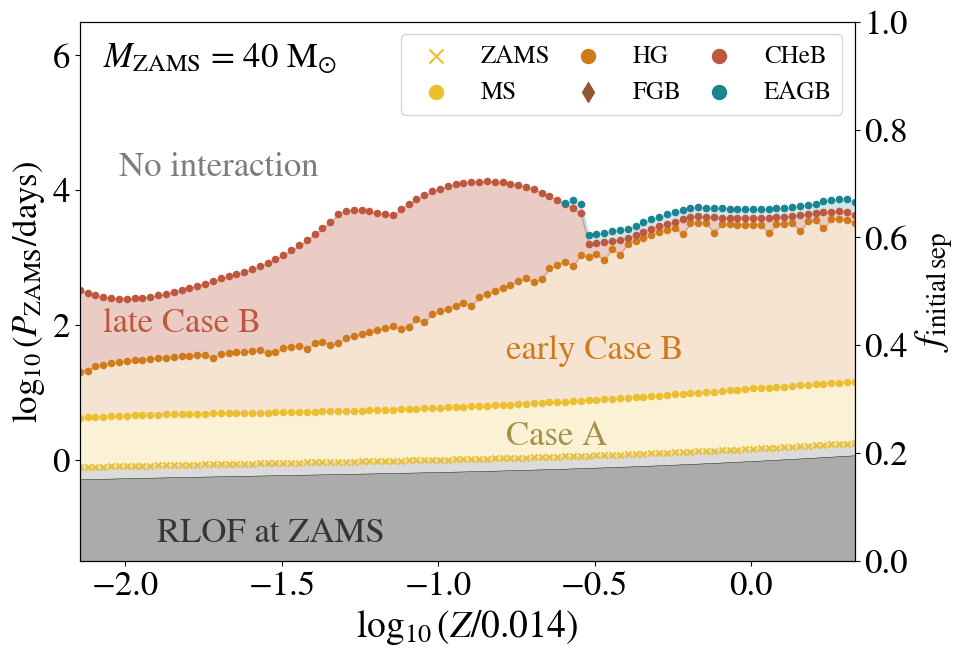

mass 10 0


/tmp/ipykernel_438568/3260850660.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(np.array(data['Metals'][mi])/0.014), np.log10(get_Prl(data['maxR_FGB'][mi],1.,mass, mass) ), marker = 'd', c = "#925632", s = 20, label = "FGB")##72bfc2, 925632


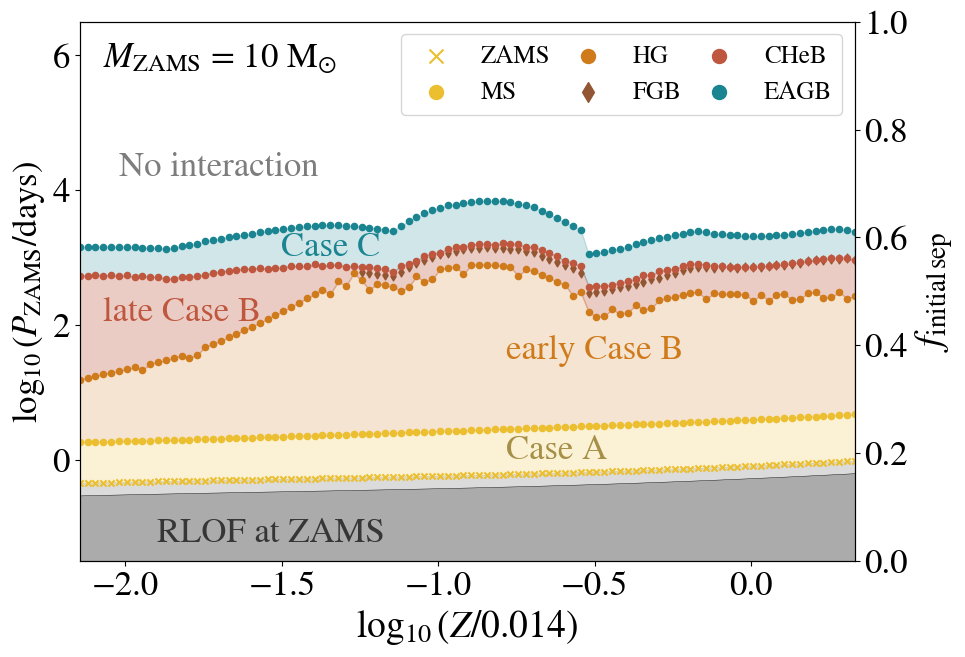

In [7]:
def plot_PZAMS_CaseABC(mass, show_legend = True, show_annotations = False, dy_caseA = 0, dy_caseC = 0):
    """
    Plot the maximum radius for each type of star as a function of metallicity
    """
    mi = data['M0'].index(mass)
    print('mass', mass, mi)

    fig, ax = plt.subplots(figsize =(10,7))
    
    # R_ZAMS
    plt.fill_between(np.log10(np.array(data['Metals'][mi])/0.014), y1 =-2, y2 = np.log10(get_Prl(data['R_ZAMS'][mi],1.,mass, mass)), color = '#dbdbdb', alpha = 1)
    plt.scatter(np.log10(np.array(data['Metals'][mi])/0.014), np.log10(get_Prl(data['R_ZAMS'][mi],1.,mass, mass) ), c = '#ebbf2f', s = 20, marker = 'x', label = 'ZAMS')

    # Case A is up to max MS
    plt.fill_between(np.log10(np.array(data['Metals'][mi])/0.014), y1 = np.log10(get_Prl(data['R_ZAMS'][mi],1.,mass, mass) ), y2 = np.log10(get_Prl(data['maxR_MS'][mi],1.,mass, mass) ),  color = '#ebbf2f', alpha = 0.2)

    #early Case B is between MS and HG 
    plt.fill_between(np.log10(np.array(data['Metals'][mi])/0.014), y1 = np.log10(get_Prl(data['maxR_MS'][mi], 1.,mass, mass) ),
                      y2 = np.log10(get_Prl(data['maxR_HG'][mi],1.,mass, mass)), color = '#cf7b1b', alpha = 0.2)
    
    #late Case B is after HG, but before core He ignition
    plt.fill_between(np.log10(np.array(data['Metals'][mi])/0.014), y1 = np.log10(get_Prl(data['maxR_HG'][mi],1.,mass, mass)),
                      y2 = np.log10(get_Prl(data['maxR_CHeB'][mi],1.,mass, mass)), color = '#bf573f', alpha = 0.3)
                    #   y2 = np.maximum(np.log10(get_Prl(data['maxR_FGB'][mi],1.,mass, mass)), np.log10(get_Prl(data['maxR_HG'][mi],1.,mass, mass))), color = '#cf7b1b', alpha = 0.2)

    # Case C is after core H exhaustion, but before core He ignition
    plt.fill_between(np.log10(np.array(data['Metals'][mi])/0.014), y1 = np.log10(get_Prl(data['maxR_CHeB'][mi],1.,mass, mass)), 
                     y2 = np.log10(get_Prl(data['maxRadii'][mi],1.,mass, mass) ),  color = '#1a8591', alpha = 0.2)

    # Per types
    plt.scatter(np.log10(np.array(data['Metals'][mi])/0.014), np.log10(get_Prl(data['maxR_MS'][mi],1.,mass, mass) ), c = '#ebbf2f', s = 20, label = 'MS')

    plt.scatter(np.log10(np.array(data['Metals'][mi])/0.014), np.log10(get_Prl(data['maxR_HG'][mi],1.,mass, mass) ), c = "#cf7b1b", s = 20, label = "HG")

    plt.scatter(np.log10(np.array(data['Metals'][mi])/0.014), np.log10(get_Prl(data['maxR_FGB'][mi],1.,mass, mass) ), marker = 'd', c = "#925632", s = 20, label = "FGB")##72bfc2, 925632

    plt.scatter(np.log10(np.array(data['Metals'][mi])/0.014), np.log10(get_Prl(data['maxR_CHeB'][mi],1.,mass, mass) ), c = "#bf573f", s = 20, label = "CHeB") #1a8591, bf573f

    plt.scatter(np.log10(np.array(data['Metals'][mi])/0.014), np.log10(get_Prl(data['maxR_EAGB'][mi],1.,mass, mass) ), c = "#1a8591", s = 20, label = "EAGB") #19445c


    # ZAMS merger (a < r1 + r2 = 2 r)
    R_merger = 2 * np.array(data['R_ZAMS'][mi])
    plt.fill_between(np.log10(np.array(data['Metals'][mi])/0.014), y1=-2, y2=np.log10(Kepler3(R_merger, mass, mass)), 
                     facecolor='#ababab', edgecolor='k', lw = 0.3, alpha=1.)
    
    # Add a second axis on the right
    r_ax = ax.twinx()    
    # r_ax = ax.secondary_yaxis('right')
    r_ax.set_ylabel('$f_{\mathrm{initial\, sep}}$', size = 28)

    ax.text(0.03, 0.9, r'$M_{\rm ZAMS}$ = %s M$_{\odot}$'%(mass), transform=ax.transAxes, 
            ha = 'left', va = 'bottom', size = 25)
    

    if show_annotations:
        ax.text(0.1, 0.05, 'RLOF at ZAMS', ha='left', va='center', c = '#363636', size = 25, transform=ax.transAxes)
        ax.text(0.55, 0.23 + dy_caseA, 'Case A ', ha='left', va='center', c = '#a68f46', size = 25, transform=ax.transAxes)
        ax.text(0.55, 0.39,'early Case B', ha='left', va='center', c = '#cf7b1b',size = 25, transform=ax.transAxes)
        ax.text(0.03, 0.46 + dy_caseC, 'late Case B', ha='left', va='center', c = '#bf573f', size = 25, transform=ax.transAxes)
        ax.text(0.05, 0.73, 'No interaction', ha='left', va='center', c = '#7d7d7d', size = 25, transform=ax.transAxes)

    # just manually adjusting this for manuscript plot
    if mass == 10:
        ax.text(0.26, 0.58, 'Case C', ha='left', va='center', c = '#1a8591', size = 25, transform=ax.transAxes)

    # Plotvalues
    if show_legend:
        handles, labels = ax.get_legend_handles_labels() 
        ax.legend(handles, labels, loc = 'upper right', ncols = 3, markerscale = 2.25, columnspacing=0.5)
    ax.set_xlabel('$\log_{10}(Z/0.014)$', fontsize = 27)
    ax.set_xlim(np.log10(1e-4/0.014), np.log10(0.03/0.014))
    ax.set_ylim(-1.5, 6.5)
    ax.set_ylabel('$\log_{10} (P_{\mathrm{ZAMS}}$/days)')

    plt.savefig(f'../Figures/PZAMS_Type_perZ_M{mass}.pdf',bbox_inches='tight')

    plt.show()

plot_PZAMS_CaseABC(40, show_legend = True, show_annotations = True, dy_caseC = -0.021)
plot_PZAMS_CaseABC(10, show_legend = True, show_annotations = True, dy_caseA = -0.025) 

mass 20 1


/tmp/ipykernel_438568/3260850660.py:35: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(np.log10(np.array(data['Metals'][mi])/0.014), np.log10(get_Prl(data['maxR_FGB'][mi],1.,mass, mass) ), marker = 'd', c = "#925632", s = 20, label = "FGB")##72bfc2, 925632


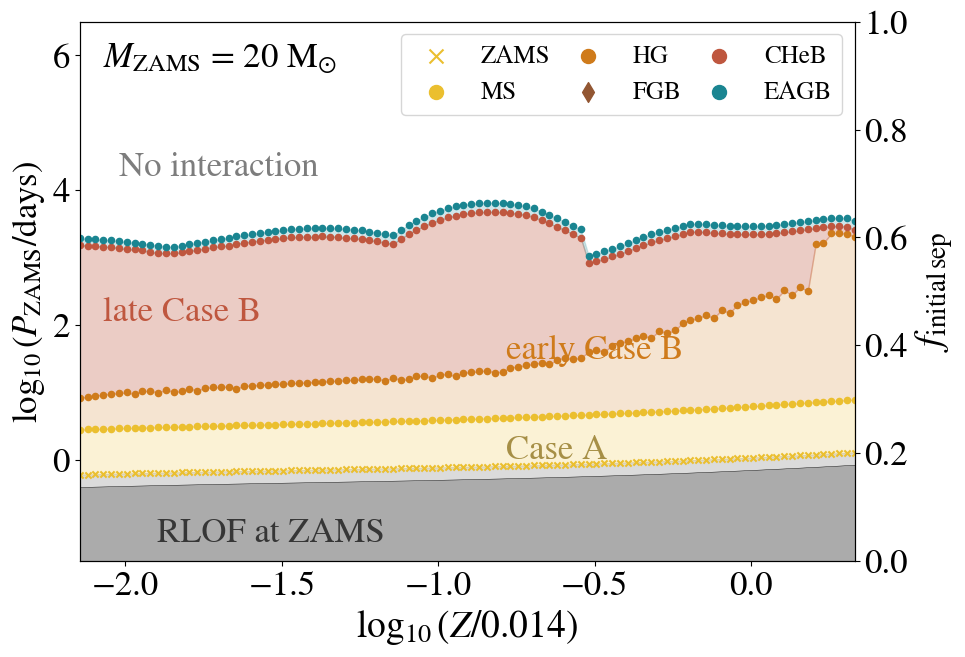

In [15]:
plot_PZAMS_CaseABC(20, show_legend = True, show_annotations = True, dy_caseA = -0.025) 
